#  Algorithmic Trading and Backtesting

## Content
* [1. Problem Statement](#1)
* [2. Importing / Loading the Libraries and the data](#2)
* [3. Visualize the Variations in Data for AAP -- Exploratory Data Analysis](#3)
* [4. Simple Moving Averages calculations for 12 and 26 Days](#4)
* [5.Convert the stock price data to returns and check the position of the 12-day MA (fast)
    with respect to the 26-day MA (slow) a](#5)
* [6.Visualize the closing price,short and long moving averages](#6)
* [7.Implement a simple backtester (create a portfolio which can generate orders and manages the profit and
    loss)](#7)
* [8.Visualize the original data series and backtest series to check the
    performance of trading strategy](#8)
* [9.Place Holder1](#9)
* [10.Place Holder2](#10)

<a id='1'></a>
## 1. Loading the Libraries and the data

Checking if the additional packages needed are present, if not install them. These are checked separately to ensure that all dependencies are met.

In [6]:
# import packages/load necessary libraries 
"""
A trading strategy using backtesting ...This is a placeholder for comments, text
"""

%matplotlib inline
import numpy as np 
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings

In [7]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1'></a>
## 2. Loading the Data using a date range. Ticker : AAP
We Extract the data required for analysis into a data frame

In [8]:
# set start and end dates 
start = datetime.datetime(2010, 1, 1) 
end = datetime.datetime(2019, 8, 5) 
# extract the closing price data
aap_df = web.DataReader(['AAP'], 'yahoo', start = start, end = end)['Close']
aap_df.columns = {'Close Price'}

In [9]:
#aap_df.head(100)
#aap_df.tail(100)
aap_df.describe()

,Close Price
count,2413.000000
mean,112.941152
std,42.536125
min,39.160000
25%,71.580002
50%,115.980003
75%,153.250000
max,200.380005


In [10]:
#Checking for any null values and removing null values
print('Null Values =', aap_df.isnull().values.any())

Null Values = False


<a id='1'></a>
## 3. Visualize the Variations in the Data. Ticker : AAP
We Plot the data to visualize the stock performance across the date range

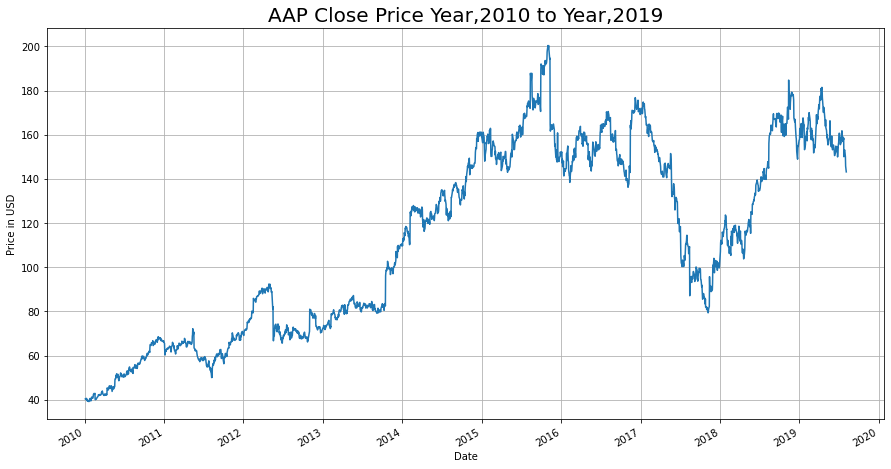

In [11]:
aap_df['Close Price'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price in USD")
plt.title('AAP Close Price Year,2010 to Year,2019', fontsize = 20)
plt.show()

<a id='1'></a>
## 4. Simple Moving Averages Calculations for 12 and 26 Days. Ticker : AAP
We calculate and display the two SMAs for 12 and 26 days

In [16]:
# create 12 days simple moving average column

aap_df['12_SMA'] = aap_df['Close Price'].rolling(window = 12, min_periods = 1).mean()
# create 26 days simple moving average column
aap_df['26_SMA'] = aap_df['Close Price'].rolling(window = 26, min_periods = 1).mean()
# display first few rows
aap_df.head()

,Close Price,12_SMA,26_SMA,Signal
Date,,,,
2010-01-04,40.380001,40.380001,40.380001,0.0
2010-01-05,40.139999,40.260000,40.260000,0.0
2010-01-06,40.490002,40.336667,40.336667,0.0
2010-01-07,40.480000,40.372500,40.372500,0.0
2010-01-08,40.639999,40.426000,40.426000,0.0


<a id='1'></a>
## 5. Converting stock price data to returns. Ticker : AAP


In [17]:
aap_df['Signal'] = 0.0
aap_df['Signal'] = np.where(aap_df['12_SMA'] > aap_df['26_SMA'], 1.0, 0.0)

<a id='1'></a>
## 6. Visualize Closing Price,Short and Long Moving Averages. Ticker : AAP

In [18]:
aap_df['Position'] = aap_df['Signal'].diff()
# display first few rows
aap_df.head()

,Close Price,12_SMA,26_SMA,Signal,Position
Date,,,,,
2010-01-04,40.380001,40.380001,40.380001,0.0,NaN
2010-01-05,40.139999,40.260000,40.260000,0.0,0.0
2010-01-06,40.490002,40.336667,40.336667,0.0,0.0
2010-01-07,40.480000,40.372500,40.372500,0.0,0.0
2010-01-08,40.639999,40.426000,40.426000,0.0,0.0


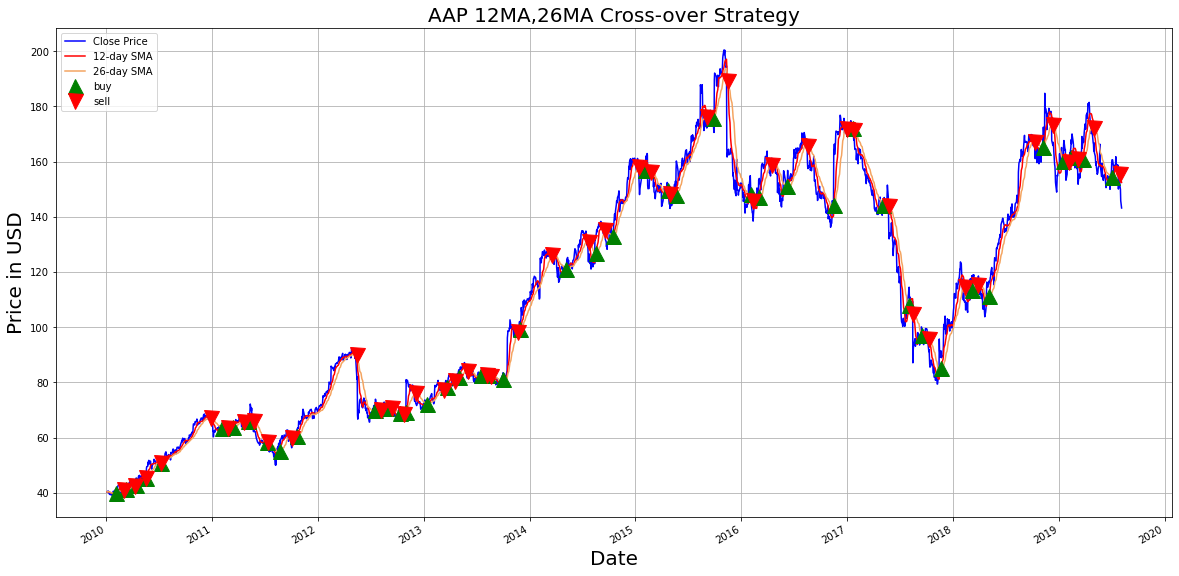

In [19]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
aap_df['Close Price'].plot(color = 'blue', label= 'Close Price') 
aap_df['12_SMA'].plot(color = 'red',label = '12-day SMA')
aap_df['26_SMA'].plot(color = 'sandybrown', label = '26-day SMA')
# plot ‘buy’ signals
plt.plot(aap_df[aap_df['Position'] == 1].index, 
         aap_df['12_SMA'][aap_df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(aap_df[aap_df['Position'] == -1].index, 
         aap_df['12_SMA'][aap_df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
        
plt.ylabel('Price in USD', fontsize = 20 )
plt.xlabel('Date', fontsize = 20 )
plt.title('AAP 12MA,26MA Cross-over Strategy', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

<a id='1'></a>
## 7. Implement a simple Backtester. Ticker : AAP

<a id='1'></a>
## 8. Visualize Original data Series and backtest series to check performance of trading strategy. Ticker : AAP




##  APPENDIX 


Trend Following Strategy: 
The strategy as outlined here is long-only. Two separate simple moving average filters are created, with varying lookback periods, of a particular time series. Signals to purchase the asset occur when the shorter lookback moving average exceeds the longer lookback moving average. If the longer average subsequently exceeds the shorter average, the asset is sold back. The strategy works well when a time series enters a period of strong trend and then slowly reverses the trend.

In [2]:
def MovingAverageCrossStrategy(stock_symbol = 'AAP', start_date = '2018-01-01', end_date = '2020-01-01', 
                               short_window = 12, long_window = 26, moving_avg = 'SMA', display_table = True):
    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on Yahoo finance. Eg: 'AAP' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)

In [3]:
MovingAverageCrossStrategy('AAP', '2016-08-31', '2020-08-31', 50, 200, 'SMA', display_table = True)

## Backtesting the Trading Strategy: 
Backtesting refers to applying a trading system to historical data to verify how a system would have performed during the specified time period. For example, in the simple moving average crossover system, the trader would be able to input (or change) the lengths of the two moving averages used in the system. The trader could backtest to determine which lengths of moving averages would have performed the best on the historical data. In this project, the participants are expected to 
### (i) visualize the variations in the data and 
### (ii) obtain the simple moving average for 12 days and 26 days 
### (iii) convert the stock price data to returns and check the position of the 12-day MA (fast) with respect to the 26-day MA (slow) and 
### (iv) visualize the closing price, short and long moving averages and 
### (v) implement a simple backtester (create a portfolio which can generate orders and manages the profit and
### loss) 
### (vi) visualize the original data series and backtest series to check the
### performance of trading strategy.


 
    
   ####  References: Droke, C. (2001). Moving Averages Simplified. United States: Marketplace Books.
            
  ####  https://finance.yahoo.com/
  #### https://www.investopedia.com/technical-analysis-4689657
  
#### The Golden Cross: This occurs whenever the short-term moving average crosses the long-term moving average from the below to the above as a sign of a bullish continuation.

#### The Death Cross: This occurs whenever the short-term moving average crosses the long-term moving average from the above to the below as a sign of a bearish continuation.

In [51]:
!pip install Backtesting

  Created wheel for Backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173835 sha256=3adcafd851292849c8044b5c63c0dcbd556086268b445dd00e6763310902fd72
  Stored in directory: c:\users\aduri\appdata\local\pip\cache\wheels\3f\7c\24\f8816cdb5359accfe50ebbb023baf41e98592f11528ed26ce6
Successfully built Backtesting


In [29]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 12
    n2 = 26

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(GOOG, SmaCross,
              cash=10000, commission=.002,
              exclusive_orders=True)

output = bt.run()
bt.plot()

Row(id='1450', ...)

In [30]:
# Example OHLC daily data for Google Inc.
from backtesting.test import GOOG
GOOG.tail()

,Open,High,Low,Close,Volume
2013-02-25,802.3,808.41,790.49,790.77,2303900
2013-02-26,795.0,795.95,784.40,790.13,2202500
2013-02-27,794.8,804.75,791.11,799.78,2026100
2013-02-28,801.1,806.99,801.03,801.20,2265800
2013-03-01,797.8,807.14,796.15,806.19,2175400


In [31]:
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [32]:
    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    # Ugh!
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()

In [35]:
from backtesting import Backtest

bt = Backtest(GOOG, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
stats

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

Moving Average Algo Trading System Backtest In Python Using Pandas - System VS Benchmark Youtube